## Mount the drive unit

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


## Import the libs

In [ ]:
# Please, install all the neccesary libs.
import datetime
import numpy as np

import matplotlib.pyplot as plt
import os 
import json 

import cv2
import subprocess
import tifffile as tiff
from google.colab.patches import cv2_imshow

### Define the folder access path.

In [ ]:
rootPath="/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/Resultados/2016/"

### Define the crop_image function.

In [ ]:

def crop_image(img,campo):
  mask = np.zeros(img.shape[0:2], dtype=np.uint8)
  if campo == 'campo1':
    points = np.array([[[191,39],[110,412],[221,402],[283,421],[311,315],[394,333],[443,117],[276,38]]]) #Talca first part
  else:
    points = np.array([[[118,22],[93,35],[79,52],[51,85],[233,304],[285,340],[452,380],[569,51]]])  #Talca second part
  cv2.drawContours(mask, [points], -1, (255, 255, 255), -1, cv2.LINE_AA)
  res = cv2.bitwise_and(img,img,mask = mask)

  return res

### Get the folders

In [ ]:
folders=os.listdir(rootPath)
print(len(folders))

36


In [ ]:
definitive_folders=[]
for folder in folders:
  if folder[7:18]=='SentinelL1C':
    definitive_folders.append(folder)
print(len(definitive_folders))

36


In [ ]:
difference_folders=[]
for folder in folders:
  if folder[7:18]=='SentinelL2A':
    difference_folders.append(folder)
print(len(difference_folders))

0


In [ ]:
print(len(definitive_folders)+len(difference_folders))

36


In [ ]:
folders=definitive_folders
print(len(folders))

36


In [ ]:
channel_list=[]
image_index=[]
for folder in folders:
  path=rootPath+folder+'/channels/'
  channels=os.listdir(path)
  channels.sort()
  print(channels)
  path=rootPath+folder+"/vegetation_indices/"
  mkdircommand=['mkdir', path]
  subprocess.run(mkdircommand).stdout
  for channel in channels:
    channel_list.append(rootPath+folder+'/channels/'+channel)

['channel10_campo1_2016-01-05.tiff', 'channel11_campo1_2016-01-05.tiff', 'channel12_campo1_2016-01-05.tiff', 'channel13_campo1_2016-01-05.tiff', 'channel1_campo1_2016-01-05.tiff', 'channel2_campo1_2016-01-05.tiff', 'channel3_campo1_2016-01-05.tiff', 'channel4_campo1_2016-01-05.tiff', 'channel5_campo1_2016-01-05.tiff', 'channel6_campo1_2016-01-05.tiff', 'channel7_campo1_2016-01-05.tiff', 'channel8_campo1_2016-01-05.tiff', 'channel9_campo1_2016-01-05.tiff']
['channel10_campo1_2016-06-13.tiff', 'channel11_campo1_2016-06-13.tiff', 'channel12_campo1_2016-06-13.tiff', 'channel13_campo1_2016-06-13.tiff', 'channel1_campo1_2016-06-13.tiff', 'channel2_campo1_2016-06-13.tiff', 'channel3_campo1_2016-06-13.tiff', 'channel4_campo1_2016-06-13.tiff', 'channel5_campo1_2016-06-13.tiff', 'channel6_campo1_2016-06-13.tiff', 'channel7_campo1_2016-06-13.tiff', 'channel8_campo1_2016-06-13.tiff', 'channel9_campo1_2016-06-13.tiff']
['channel10_campo1_2016-04-04.tiff', 'channel11_campo1_2016-04-04.tiff', 'channe

### Compute the vegetation indices and then save them.

In [ ]:
channel_list=[]
image_index=[]
cropped_image_index=[]
for folder in folders:
  path=rootPath+folder+'/channels/'
  channels=os.listdir(path)
  channels.sort()
  print(channels)
  path=rootPath+folder+"/vegetation_indices/"
  mkdircommand=['mkdir', path]
  subprocess.run(mkdircommand).stdout
  path_cropped=rootPath+folder+"/cropped_vegetation_indices/"
  mkdircommand=['mkdir', path_cropped]
  subprocess.run(mkdircommand).stdout
  for channel in channels:
    channel_list.append(rootPath+folder+'/channels/'+channel)

  R=tiff.imread(channel_list[7])
  G=tiff.imread(channel_list[6])
  B=tiff.imread(channel_list[5])
  NIR=tiff.imread(channel_list[11])

  NDVI=(NIR-R)/(R+NIR)
  #plt.imshow(NDVI)
  image_index.append(NDVI)
  print(path+"NDVI_"+folder+".tiff")
  cv2.imwrite(path+"NDVI_"+folder+".tiff", NDVI)
  cropped_image=crop_image(NDVI,folder[:6])
  cv2.imwrite(path_cropped+"NDVI_"+folder+".tiff", cropped_image)

  RVI=(R)/(NIR)
  #plt.imshow(RVI)
  image_index.append(RVI)
  cv2.imwrite(path+"RVI_"+folder+".tiff", RVI)
  cropped_image=crop_image(RVI,folder[:6])
  cv2.imwrite(path_cropped+"RVI_"+folder+".tiff", cropped_image)

  DVI=(NIR-R)
  #plt.imshow(DVI)
  image_index.append(DVI)
  cv2.imwrite(path+"DVI_"+folder+".tiff", DVI)
  cropped_image=crop_image(DVI,folder[:6])
  cv2.imwrite(path_cropped+"DVI_"+folder+".tiff", cropped_image)
  

  PVI=((0.355*NIR-0.149*R)**(2)+(0.355*R-0.852*NIR)**(2))**(1/2)
  #plt.imshow(PVI)
  image_index.append(PVI)
  cv2.imwrite(path+"PVI_"+folder+".tiff", PVI)
  cropped_image=crop_image(PVI,folder[:6])
  cv2.imwrite(path_cropped+"PVI_"+folder+".tiff", cropped_image)
  
  ARVI=(NIR-abs(R-B))/(NIR+abs(R-B))
  #plt.imshow(ARVI)
  image_index.append(ARVI)
  cv2.imwrite(path+"ARVI_"+folder+".tiff", ARVI)
  cropped_image=crop_image(ARVI,folder[:6])
  cv2.imwrite(path_cropped+"ARVI_"+folder+".tiff", cropped_image)

  VIN=R/NIR
  #plt.imshow(VIN)
  image_index.append(VIN)
  cv2.imwrite(path+"VIN_"+folder+".tiff", VIN)
  cropped_image=crop_image(VIN,folder[:6])
  cv2.imwrite(path_cropped+"VIN_"+folder+".tiff", cropped_image)
  

  TVI=(NDVI+0.5)**2
  #plt.imshow(TVI)
  image_index.append(TVI)
  cv2.imwrite(path+"TVI_"+folder+".tiff", TVI)
  cropped_image=crop_image(TVI,folder[:6])
  cv2.imwrite(path_cropped+"TVI_"+folder+".tiff", cropped_image)

  RG=R/G
  #plt.imshow(RG)
  image_index.append(RG)
  cv2.imwrite(path+"RG_"+folder+".tiff", RG)
  cropped_image=crop_image(RG,folder[:6])
  cv2.imwrite(path_cropped+"RG_"+folder+".tiff", cropped_image)

  GNDVI=(NIR-G)/(NIR+G)
  #plt.imshow(GNDVI)
  image_index.append(GNDVI)
  cv2.imwrite(path+"GNDVI_"+folder+".tiff", GNDVI)
  cropped_image=crop_image(GNDVI,folder[:6])
  cv2.imwrite(path_cropped+"GNDVI_"+folder+".tiff", cropped_image)

  NGRDI=(G-R)/(G+R)
  #plt.imshow(NGRDI)
  image_index.append(NGRDI)
  cv2.imwrite(path+"NGRDI_"+folder+".tiff", NGRDI)
  cropped_image=crop_image(NGRDI,folder[:6])
  cv2.imwrite(path_cropped+"NGRDI_"+folder+".tiff", cropped_image)  

  channel_list=[]








['channel10_campo1_2016-01-05.tiff', 'channel11_campo1_2016-01-05.tiff', 'channel12_campo1_2016-01-05.tiff', 'channel13_campo1_2016-01-05.tiff', 'channel1_campo1_2016-01-05.tiff', 'channel2_campo1_2016-01-05.tiff', 'channel3_campo1_2016-01-05.tiff', 'channel4_campo1_2016-01-05.tiff', 'channel5_campo1_2016-01-05.tiff', 'channel6_campo1_2016-01-05.tiff', 'channel7_campo1_2016-01-05.tiff', 'channel8_campo1_2016-01-05.tiff', 'channel9_campo1_2016-01-05.tiff']
/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/Resultados/2016/campo1_SentinelL1C_2016-01-05/vegetation_indices/NDVI_campo1_SentinelL1C_2016-01-05.tiff
['channel10_campo1_2016-06-13.tiff', 'channel11_campo1_2016-06-13.tiff', 'channel12_campo1_2016-06-13.tiff', 'channel13_campo1_2016-06-13.tiff', 'channel1_campo1_2016-06-13.tiff', 'channel2_campo1_2016-06-13.tiff', 'channel3_campo1_2016-06-13.tiff', 'channel4_campo1_2016-06-13.tiff', 'channel5_campo1_2016-06-13.tiff', 'channel6_campo1_2016-06-13.tiff', 'channel7_campo1_2016-06-13.tiff'

### Making some test to see the vegetation indices images.

In [ ]:
readPath="/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/Resultados/2019-12-prueba/campo1_SentinelL1C_2019-12-30/cropped_vegetation_indices/"
indices=os.listdir(readPath)
print(indices)

['NDVI_campo1_SentinelL1C_2019-12-30.tiff', 'RVI_campo1_SentinelL1C_2019-12-30.tiff', 'DVI_campo1_SentinelL1C_2019-12-30.tiff', 'PVI_campo1_SentinelL1C_2019-12-30.tiff', 'ARVI_campo1_SentinelL1C_2019-12-30.tiff', 'VIN_campo1_SentinelL1C_2019-12-30.tiff', 'TVI_campo1_SentinelL1C_2019-12-30.tiff', 'RG_campo1_SentinelL1C_2019-12-30.tiff', 'GNDVI_campo1_SentinelL1C_2019-12-30.tiff', 'NGRDI_campo1_SentinelL1C_2019-12-30.tiff']


RG_campo1_SentinelL1C_2019-12-30.tiff


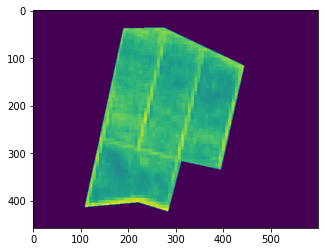

In [ ]:
i=7
img_read= tiff.imread(readPath+indices[i])
print(indices[i])
plt.imshow(img_read)

## CROP OVER CAMPO2 IMAGES BY CUARTELES

### Read one vegetation index image of campo2 to test the script.

/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/Resultados/2017-2020/campo2_SentinelL1C_2019-12-15/vegetation_indices/NDVI_campo2_SentinelL1C_2019-12-15.tiff


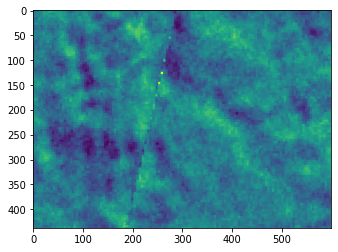

In [ ]:
img='/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/Resultados/2017-2020/campo2_SentinelL1C_2019-12-15/vegetation_indices/NDVI_campo2_SentinelL1C_2019-12-15.tiff'
R= tiff.imread(img)
print(img)
plt.imshow(R)

### Function to do the crops.

In [ ]:
def crop_image(img, points):
  #Tratar de cropear la imagen
  mask = np.zeros(img.shape[0:2], dtype=np.uint8)
  cv2.drawContours(mask, [points], -1, (255, 255, 255), -1, cv2.LINE_AA)
  res = cv2.bitwise_and(img,img,mask = mask)

  return res

### CUARTEL 1

In [ ]:
points = np.array([[[118,22],[93,35],[79,52],[51,85],[231,283],[224,24]]]) #Talca second part CUATEL 1

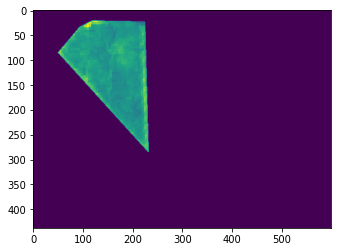

In [ ]:
img_crop=crop_image(R, points)
plt.imshow(img_crop)

### CUARTEL 2

In [ ]:
points = np.array([[[224,24],[235,294],[276,326],[285,302],[384,36]]]) #Talca second part CUARTEL 2

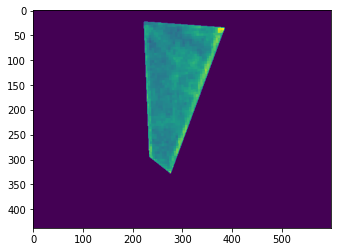

In [ ]:
img_crop=crop_image(R, points)
plt.imshow(img_crop)

### CUARTEL 3

In [ ]:
points = np.array([[[390,43],[291,303],[299,335],[354,362],[462,366],[569,54]]]) #Talca second part CUARTEL 3

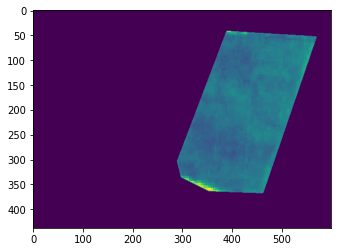

In [ ]:
img_crop=crop_image(R, points)
plt.imshow(img_crop)